In [ ]:
# Drop columns with all or mostly missing values
df_cleaned = df.drop(columns=['CitesURL', 'CitationURL', 'FullTextURL', 'RelatedURL'])

# Convert QueryDate to datetime
df_cleaned['QueryDate'] = pd.to_datetime(df_cleaned['QueryDate'])

# Fill missing values
df_cleaned['DOI'] = df_cleaned['DOI'].fillna('Unknown')
df_cleaned['Abstract'] = df_cleaned['Abstract'].fillna('No abstract')
df_cleaned['Volume'] = df_cleaned['Volume'].fillna(0).astype(int)
df_cleaned['Issue'] = df_cleaned['Issue'].fillna(0).astype(int)
df_cleaned['StartPage'] = df_cleaned['StartPage'].fillna(0).astype(int)
df_cleaned['EndPage'] = df_cleaned['EndPage'].fillna(0).astype(int)

# Optionally: Create a new feature for article length (pages)
df_cleaned['PageCount'] = df_cleaned['EndPage'] - df_cleaned['StartPage']

# Strip whitespace in string fields
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].str.strip()

df_cleaned.head()


# Task
Tell me about this dataset.

Here is all the data you need:
"PoPCites.csv"

## Data loading

### Subtask:
Load the dataset "PoPCites.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "PoPCites.csv" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('PoPCites.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'PoPCites.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,107,"I. Landi, B.S. Glicksberg, H.-C. Lee, S. Chern...",Deep representation learning of electronic hea...,2020,npj Digital Medicine,Nature Research,https://www.scopus.com/inward/record.uri?eid=2...,NaN,134,2024-12-11 21:11:35,...,NaN,NaN,107,26.75,12,9,4,Deriving disease subtypes from electronic heal...,NaN,NaN
1,95,"W. Wang, Y. Yan, Z. Guo, H. Hou, M. Garcia, X....",All around suboptimal health — a joint positio...,2021,EPMA Journal,Springer Science and Business Media Deutschlan...,https://www.scopus.com/inward/record.uri?eid=2...,NaN,130,2024-12-11 21:11:35,...,403.0,433.0,95,31.67,10,15,3,First two decades of the twenty-first century ...,NaN,NaN
2,80,"O. Golubnitschaja, A. Liskova, L. Koklesova, M...","Caution, “normal” BMI: health risks associated...",2021,EPMA Journal,Springer Science and Business Media Deutschlan...,https://www.scopus.com/inward/record.uri?eid=2...,NaN,108,2024-12-11 21:11:35,...,243.0,264.0,80,26.67,8,22,3,An increasing interest in a healthy lifestyle ...,NaN,NaN
3,76,"W. DeGroat, H. Abdelhalim, K. Patel, D. Mendhe...",Discovering biomarkers associated and predicti...,2024,Scientific Reports,Nature Research,https://www.scopus.com/inward/record.uri?eid=2...,NaN,71,2024-12-11 21:11:35,...,NaN,NaN,76,76.00,13,6,1,Personalized interventions are deemed vital gi...,NaN,NaN
4,75,"R.M. Hoogeveen, J.P.B. Pereira, N.S. Nurmohame...",Improved cardiovascular risk prediction using ...,2020,European Heart Journal,Oxford University Press,https://www.scopus.com/inward/record.uri?eid=2...,NaN,119,2024-12-11 21:11:35,...,3998.0,4007.0,75,18.75,8,15,4,"Aims: In the era of personalized medicine, it ...",NaN,NaN


(137, 26)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Examine the data types, missing values, descriptive statistics, potential outliers, unique values, and the first/last few rows of the DataFrame to understand its characteristics. Also check the column names for irregularities.



In [2]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Identify potential outliers using IQR for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nPotential outliers in '{col}':\n{outliers}")

# Number of unique values for each column
print("\nUnique Values:\n", df.nunique())

# Examine the first and last few rows
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# Print the shape of the DataFrame
print("\nDataFrame Shape:\n", df.shape)

# Check column names for irregularities
print("\nColumn Names:\n", df.columns)

Data Types:
 Cites               int64
Authors            object
Title              object
Year                int64
Source             object
Publisher          object
ArticleURL         object
CitesURL          float64
GSRank              int64
QueryDate          object
Type               object
DOI                object
ISSN               object
CitationURL       float64
Volume            float64
Issue             float64
StartPage         float64
EndPage           float64
ECC                 int64
CitesPerYear      float64
CitesPerAuthor      int64
AuthorCount         int64
Age                 int64
Abstract           object
FullTextURL       float64
RelatedURL        float64
dtype: object

Missing Values:
 Cites               0
Authors             0
Title               0
Year                0
Source              0
Publisher           0
ArticleURL          0
CitesURL          137
GSRank              0
QueryDate           0
Type                0
DOI                 2
ISSN           

## Data analysis

### Subtask:
Analyze the distributions of key variables and identify potential correlations.


**Reasoning**:
Analyze the distributions of 'Cites' and 'Year', and their relationship, along with exploring relationships between numerical and categorical variables, and the distribution and relationship of 'GSRank' with other variables.  Create visualizations as instructed.



Cites Distribution:
count    137.000000
mean      11.890511
std       19.890760
min        0.000000
25%        0.000000
50%        3.000000
75%       15.000000
max      107.000000
Name: Cites, dtype: float64


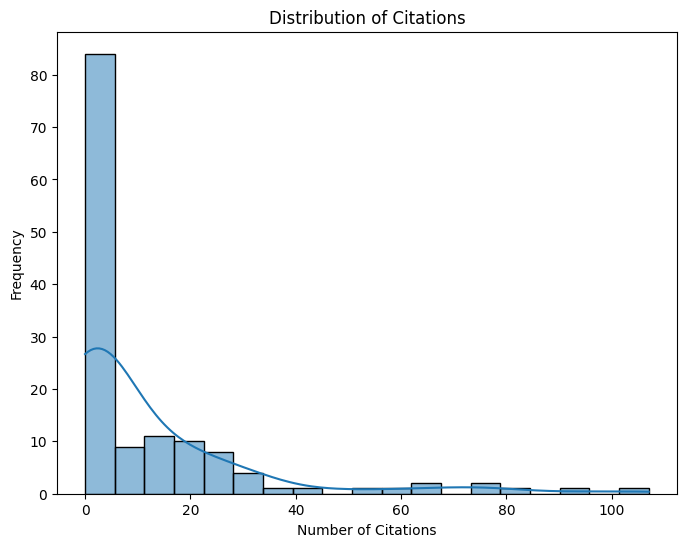


Year Distribution:
count     137.000000
mean     2022.627737
std         1.344965
min      2020.000000
25%      2022.000000
50%      2023.000000
75%      2024.000000
max      2024.000000
Name: Year, dtype: float64


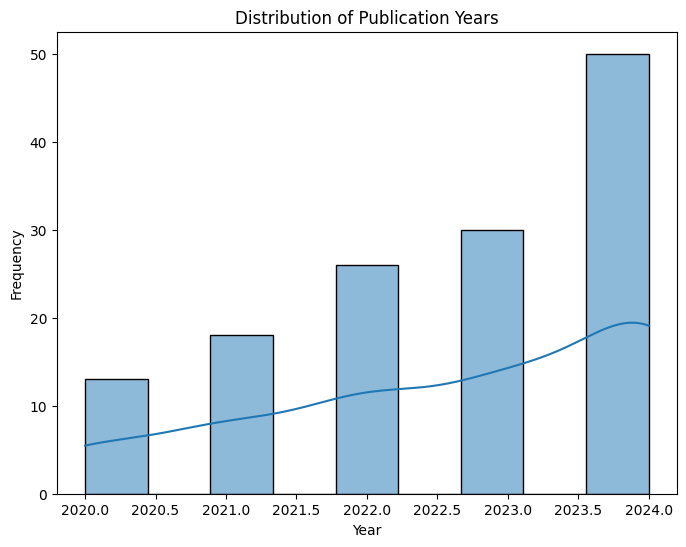


Correlation between Citations and Year: -0.5482151661738307


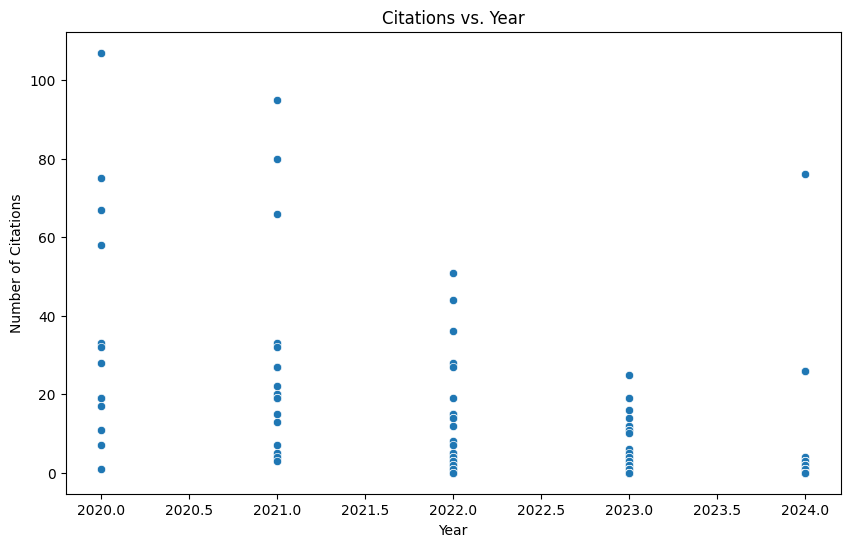


Relationship between Numerical and Categorical Variables:


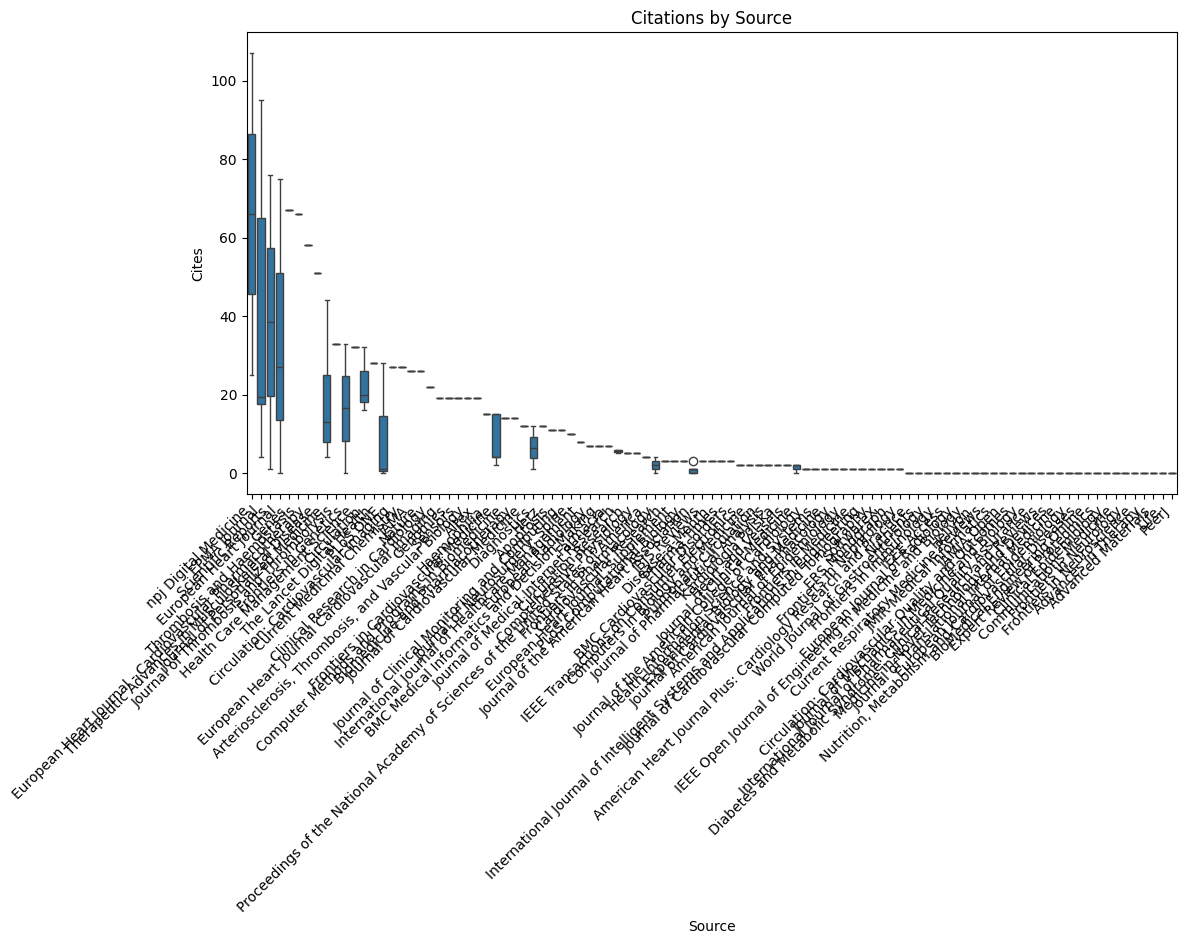


GSRank Distribution:
count    137.000000
mean      69.000000
std       39.692569
min        1.000000
25%       35.000000
50%       69.000000
75%      103.000000
max      137.000000
Name: GSRank, dtype: float64


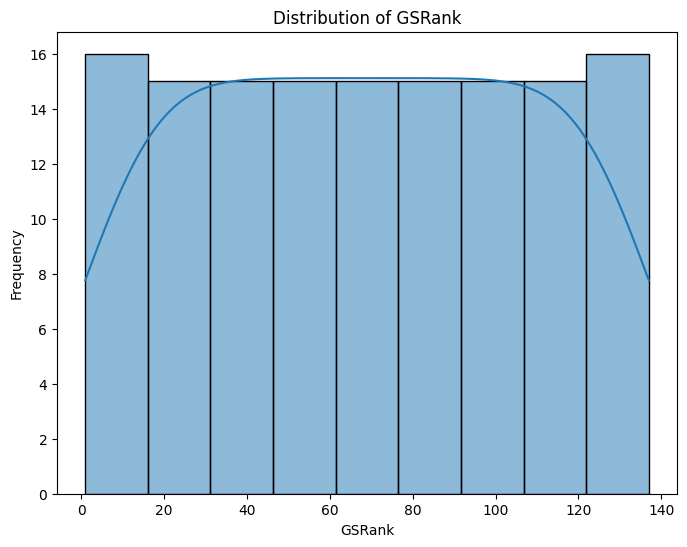


Correlation between GSRank and Citations: 0.34127414223462665


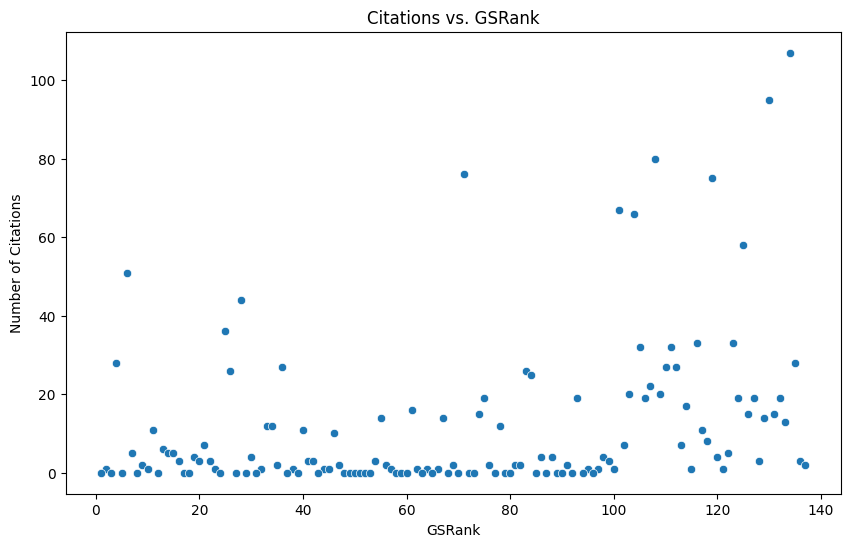

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of 'Cites'
print("Cites Distribution:")
print(df['Cites'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['Cites'], kde=True)
plt.title("Distribution of Citations")
plt.xlabel("Number of Citations")
plt.ylabel("Frequency")
plt.show()

# 2. Analyze the distribution of 'Year'
print("\nYear Distribution:")
print(df['Year'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], kde=True)
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

# 3. Relationship between 'Cites' and 'Year'
correlation = df['Cites'].corr(df['Year'])
print(f"\nCorrelation between Citations and Year: {correlation}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Cites', data=df)
plt.title("Citations vs. Year")
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.show()

# 4. Relationship between numerical and categorical variables
print("\nRelationship between Numerical and Categorical Variables:")
# Example: 'Cites' vs. 'Source'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Source', y='Cites', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Citations by Source")
plt.show()

# 5. Analyze 'GSRank' distribution and relationship with other variables
print("\nGSRank Distribution:")
print(df['GSRank'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['GSRank'], kde=True)
plt.title("Distribution of GSRank")
plt.xlabel("GSRank")
plt.ylabel("Frequency")
plt.show()

# Relationship between GSRank and Cites
correlation_gsrank_cites = df['GSRank'].corr(df['Cites'])
print(f"\nCorrelation between GSRank and Citations: {correlation_gsrank_cites}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='GSRank', y='Cites', data=df)
plt.title("Citations vs. GSRank")
plt.xlabel("GSRank")
plt.ylabel("Number of Citations")
plt.show()

## Data visualization

### Subtask:
Create visualizations to complement the data analysis, focusing on distributions and relationships between variables.


**Reasoning**:
Generate the visualizations specified in the subtask instructions, including histograms, box plots, scatter plots, and potentially a correlation heatmap or pair plot if computationally feasible.



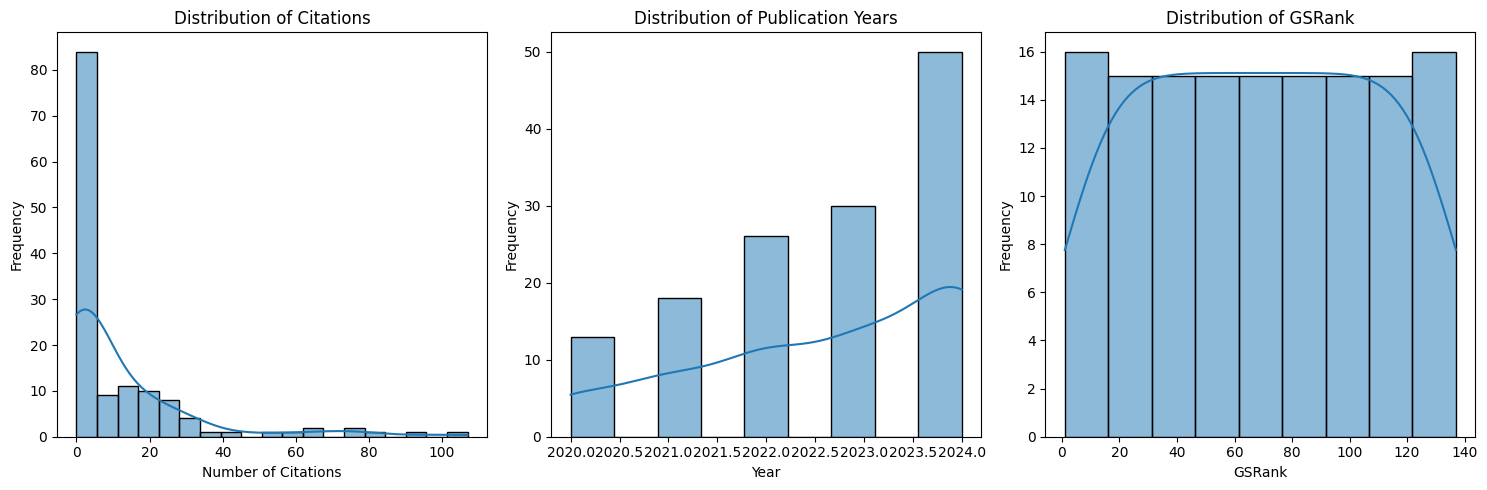

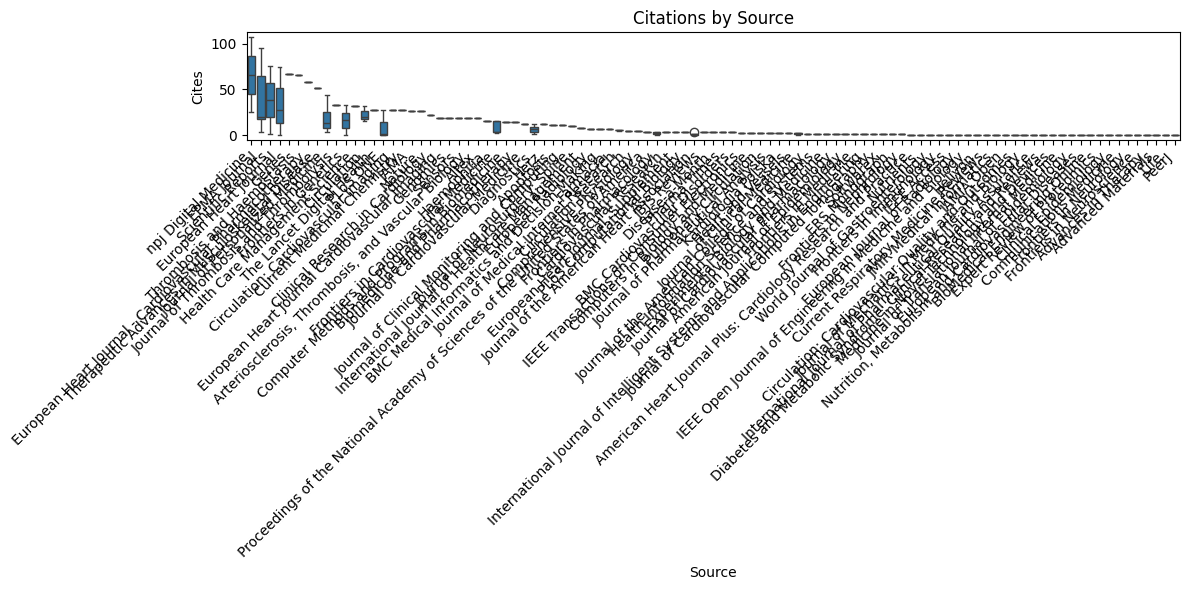

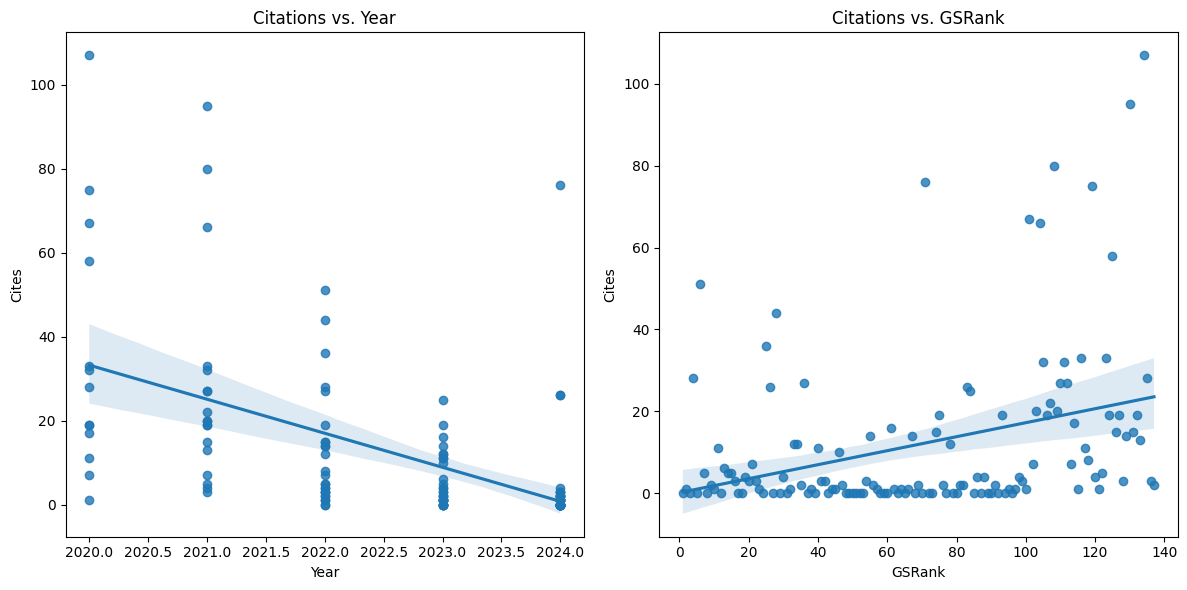

ValueError: could not convert string to float: 'I. Landi, B.S. Glicksberg, H.-C. Lee, S. Cherng, G. Landi, M. Danieletto, J.T. Dudley, C. Furlanello, R. Miotto'

<Figure size 1000x800 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Cites'], kde=True)
plt.title('Distribution of Citations')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['GSRank'], kde=True)
plt.title('Distribution of GSRank')
plt.xlabel('GSRank')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Source', y='Cites', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Citations by Source')
plt.tight_layout()
plt.show()

# Scatter plots with trend lines
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Year', y='Cites', data=df)
plt.title('Citations vs. Year')

plt.subplot(1, 2, 2)
sns.regplot(x='GSRank', y='Cites', data=df)
plt.title('Citations vs. GSRank')

plt.tight_layout()
plt.show()

# Correlation heatmap (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Reasoning**:
The previous attempt to generate the correlation heatmap failed due to non-numeric data in the DataFrame.  I will modify the code to handle this error, by selecting only the numerical columns for the correlation calculation.  Then generate the heatmap.



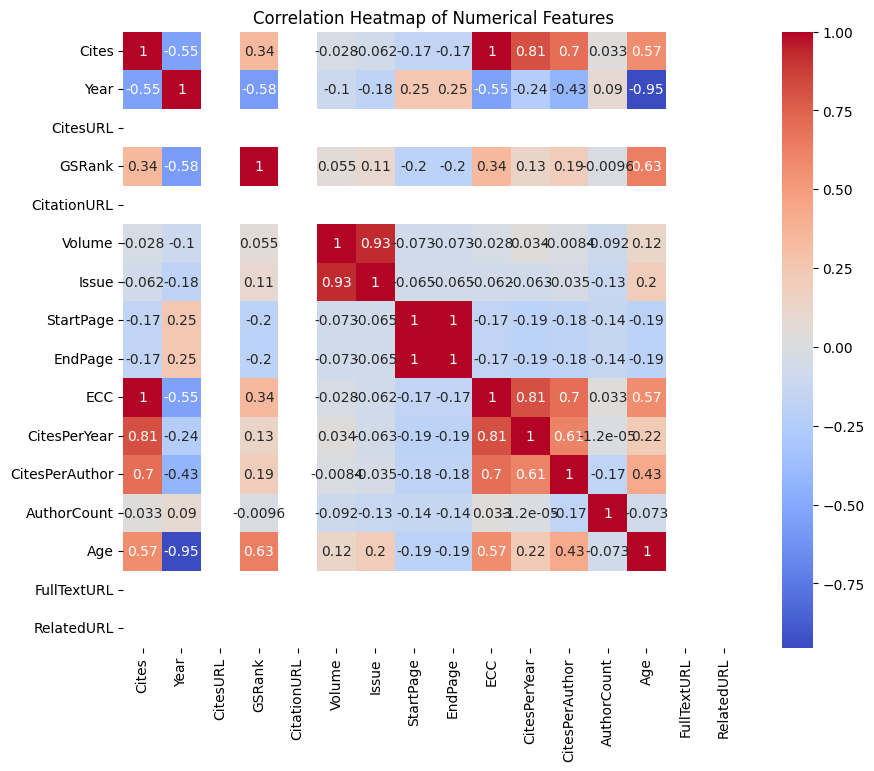

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Correlation heatmap (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()